## Problem Statement

A photoplethysmogram (PPG) is an optically obtained plethysmogram that can be used to detect blood volume changes in the microvascular bed of tissue. A PPG is often obtained by using a pulse oximeter which illuminates the skin and measures changes in light absorption. A conventional pulse oximeter monitors the perfusion of blood to the dermis and subcutaneous tissue of the skin.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7f/Final_5dff67f59d8d9300145440a4_3.gif" width=700/>

With each cardiac cycle the heart pumps blood to the periphery. Even though this pressure pulse is somewhat damped by the time it reaches the skin, it is enough to distend the arteries and arterioles in the subcutaneous tissue. If the pulse oximeter is attached without compressing the skin, a pressure pulse can also be seen from the venous plexus, as a small secondary peak.

The change in volume caused by the pressure pulse is detected by illuminating the skin with the light from a light-emitting diode (LED) and then measuring the amount of light either transmitted or reflected to a photodiode. Each cardiac cycle appears as a peak, as seen in the figure. Because blood flow to the skin can be modulated by multiple other physiological systems, the PPG can also be used to monitor breathing, hypovolemia, and other circulatory conditions. Additionally, the shape of the PPG waveform differs from subject to subject, and varies with the location and manner in which the pulse oximeter is attached.

##Our Mission

Our mission relies in creating a deep learning model based on three architectures the first one is based on Conv1D, the second one will be based on LSTM and the third one will be based on Transformers. The main purpose of the model is to estimate the SBP & DBP values of the subject of interest.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split~

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/train data segmented/VitalDB_train_Signals_DBP_SBP2.csv")
dbp=data.pop("dbp")
sbp=data.pop("sbp")
data=np.array(data,copy=False)
dbp=np.array(dbp,copy=False)
sbp=np.array(sbp,copy=False)
dbp=dbp.reshape(-1,1)
sbp=sbp.reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(data,np.concatenate([sbp,dbp],axis=1) ,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)
X_train = X_train.reshape(-1, 1, 1250)
y_train = y_train.reshape(-1, 1, 2)
X_test = X_test.reshape(-1, 1, 1250)
y_test = y_test.reshape(-1, 1, 2)
print(X_train.shape,X_test.shape)

(124128, 1, 1250) (15516, 1, 1250)


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(data, np.concatenate([sbp,dbp],axis=1),test_size=0.2)
print(X_test.shape,y_train.shape)

(31032, 1250) (124128, 2)


## Modeling with Conv1D

In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(1250, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=2))

model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=2))

model.add(Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))

model.add(Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2))

model.compile(loss=tf.losses.mean_squared_error, optimizer=Adam(learning_rate=0.0001))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 310, 96)           1152      
                                                                 
 batch_normalization_6 (Batc  (None, 310, 96)          384       
 hNormalization)                                                 
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 154, 96)          0         
 1D)                                                             
                                                                 
 conv1d_16 (Conv1D)          (None, 154, 256)          123136    
                                                                 
 batch_normalization_7 (Batc  (None, 154, 256)         1024      
 hNormalization)                                                 
                                                      

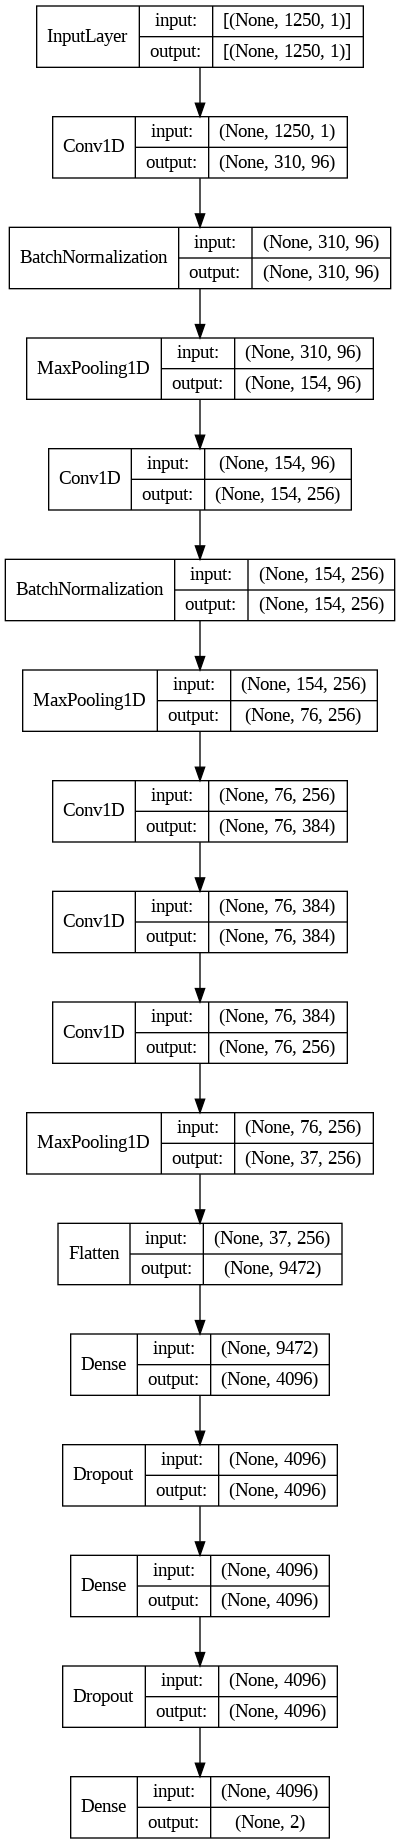

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, to_file="convmodel.png")

In [ ]:
convhistory = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1440/1440 [==============================] - 39s 26ms/step - loss: 247.0194 - val_loss: 155.4810
Epoch 2/10
1440/1440 [==============================] - 37s 26ms/step - loss: 182.4392 - val_loss: 140.3722
Epoch 3/10
1440/1440 [==============================] - 37s 25ms/step - loss: 167.4076 - val_loss: 145.0554
Epoch 4/10
1440/1440 [==============================] - 37s 26ms/step - loss: 153.6649 - val_loss: 128.4726
Epoch 5/10
1440/1440 [==============================] - 36s 25ms/step - loss: 146.5572 - val_loss: 125.9915
Epoch 6/10
1440/1440 [==============================] - 36s 25ms/step - loss: 134.7357 - val_loss: 132.3321
Epoch 7/10
1440/1440 [==============================] - 36s 25ms/step - loss: 128.4619 - val_loss: 135.2084
Epoch 8/10
1440/1440 [==============================] - 36s 25ms/step - loss: 119.4239 - val_loss: 114.6742
Epoch 9/10
1440/1440 [==============================] - 38s 26ms/step - loss: 113.0395 - val_loss: 115.3232
Epoch 10/10
1440/1440 [=====

## Conv1D Model Loss Visualization

In [ ]:
def print_loss(history):
    plt.figure()
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.ylim((0, 1000))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

In [ ]:
print_loss(convhistory)

## Conv1D Model Evaluation

In [ ]:
model.evaluate(X_test, y_test)

360/360 [==============================] - 2s 5ms/step - loss: 119.2688


119.26884460449219

In [ ]:
y_pred = model.predict(X_test)
y_test = np.array(y_test)
for i in range(5):
  print(y_pred[i],y_test[i])

360/360 [==============================] - 2s 5ms/step
[121.756996  66.335495] [106.43   57.392]
[105.98042   59.516636] [113.85   58.094]
[109.15212  60.73857] [107.36   68.084]
[116.35261   62.134693] [116.13   59.704]
[162.5466    86.572784] [144.14   83.472]


## Saving Conv1D Model

In [ ]:
model.save("convmodel.h5")

## Modeling with LSTM

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition, machine translation, robot control, video games, and healthcare. LSTM has become the most cited neural network of the 20th century.

 <img src=https://www.mdpi.com/sensors/sensors-21-05625/article_deploy/html/images/sensors-21-05625-g001.png width=800/>

The name of LSTM refers to the analogy that a standard RNN has both "long-term memory" and "short-term memory". The connection weights and biases in the network change once per episode of training, analogous to how physiological changes in synaptic strengths store long-term memories; the activation patterns in the network change once per time-step, analogous to how the moment-to-moment change in electric firing patterns in the brain store short-term memories. The LSTM architecture aims to provide a short-term memory for RNN that can last thousands of timesteps, thus "long short-term memory".

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.

The compact forms of the equations for the forward pass of an LSTM cell with a forget gate are:

 <img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/dc89390b3136ccbbc223a1ed110c6d2b4856069c width=300/>


In [ ]:
def get_lstm_model():

    inputs = tf.keras.layers.Input(shape=(X_train.shape[1:]))

    x = tf.keras.layers.LSTM(512, return_sequences=True)(inputs)
    x = tf.keras.layers.LSTM(512, return_sequences=True)(x)

    output = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output)
    output = tf.keras.layers.Dense(units=2)(output)



    model = tf.keras.models.Model(inputs=inputs, outputs=output)

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss = tf.keras.losses.mean_squared_error
    )

    return model

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2)
lstmmodel = get_lstm_model()
print(lstmmodel.summary())

NameError: ignored

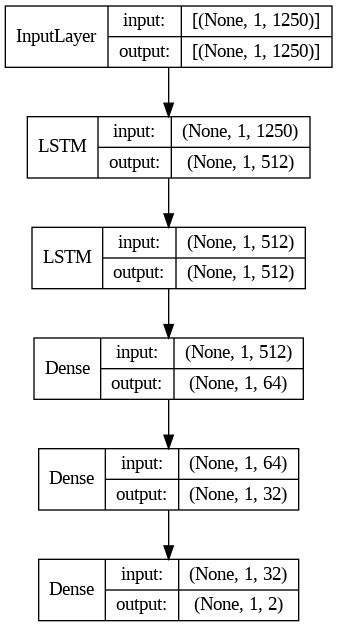

In [ ]:
tf.keras.utils.plot_model(lstmmodel, show_shapes=True, show_layer_names=False, to_file="lstmmodel.png")

In [ ]:
lstmhistory = lstmmodel.fit(X_test, y_test, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
360/360 [==============================] - 8s 13ms/step - loss: 3036.5254 - val_loss: 247.2919
Epoch 2/50
360/360 [==============================] - 3s 10ms/step - loss: 247.2053 - val_loss: 247.0110
Epoch 3/50
360/360 [==============================] - 3s 8ms/step - loss: 246.9758 - val_loss: 246.3145
Epoch 4/50
360/360 [==============================] - 3s 8ms/step - loss: 238.4737 - val_loss: 226.0648
Epoch 5/50
360/360 [==============================] - 3s 10ms/step - loss: 227.9119 - val_loss: 223.7412
Epoch 6/50
360/360 [==============================] - 4s 10ms/step - loss: 225.8294 - val_loss: 222.9621
Epoch 7/50
360/360 [==============================] - 3s 9ms/step - loss: 225.6674 - val_loss: 222.6488
Epoch 8/50
360/360 [==============================] - 3s 9ms/step - loss: 224.6050 - val_loss: 227.1884
Epoch 9/50
360/360 [==============================] - 4s 10ms/step - loss: 224.4331 - val_loss: 225.6081
Epoch 10/50
360/360 [==============================] - 3s 

## LSTM Model Loss Visualization

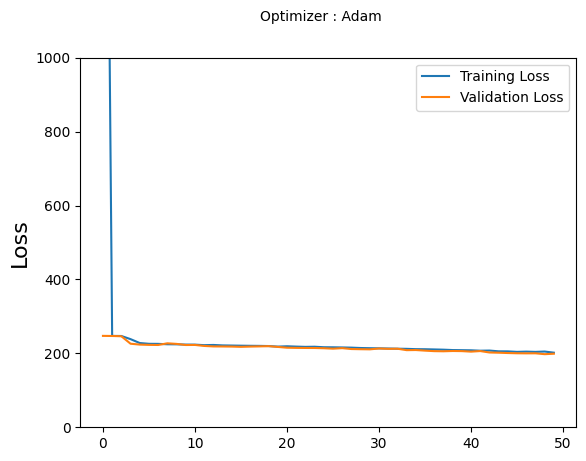

In [ ]:
print_loss(lstmhistory)

## LSTM Model Evaluation

In [ ]:
y_pred = lstmmodel.predict(X_test)
y_test = np.array(y_test)
for i in range(5):
  print(y_pred[i],y_test[i])

360/360 [==============================] - 2s 2ms/step
[[120.30964  65.0592 ]] [[106.37   64.372]]
[[116.45684  62.9454 ]] [[118.54   67.946]]
[[114.38001   61.760395]] [[121.34   68.329]]
[[115.47208   62.424213]] [[94.223 51.862]]
[[96.78327 52.16383]] [[86.574 40.169]]


## Saving LSTM Model


In [ ]:
lstmmodel.save("lstmmodel.h5")